In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [3]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [4]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [5]:
df = pd.read_csv("data_VEIEX.csv")   # change dataset name

In [6]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-12,27.61,27.61,27.61,27.61,0,2019-04-12,27.3674,2019-04-12,62.9420,2019-04-12,0.0
1,1,2019-04-11,27.53,27.53,27.53,27.53,0,2019-04-11,27.3301,2019-04-11,61.5333,2019-04-11,0.0
2,2,2019-04-10,27.83,27.83,27.83,27.83,0,2019-04-10,27.2994,2019-04-10,70.9210,2019-04-10,0.0
3,3,2019-04-09,27.69,27.69,27.69,27.69,0,2019-04-09,27.2177,2019-04-09,68.8625,2019-04-09,0.0
4,4,2019-04-08,27.67,27.67,27.67,27.67,0,2019-04-08,27.1451,2019-04-08,68.5673,2019-04-08,0.0


In [7]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    27.61
1    27.53
2    27.83
3    27.69
4    27.67
Name: close, dtype: float64

In [8]:
len(close)

5340

In [9]:
train = close.loc[:len(close) -  int(len(close)*0.15)  -1]
test = close.loc[len(close) -  int(len(close)*0.15) :]
print(train.tail())
print(test.head())

4534    7.76
4535    7.95
4536    8.07
4537    8.04
4538    8.16
Name: close, dtype: float64
4539    8.33
4540    8.34
4541    8.17
4542    8.09
4543    8.34
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

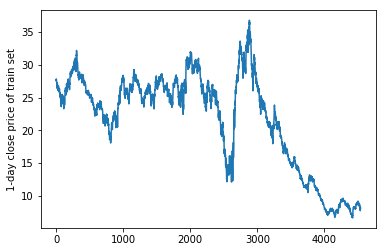

In [10]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

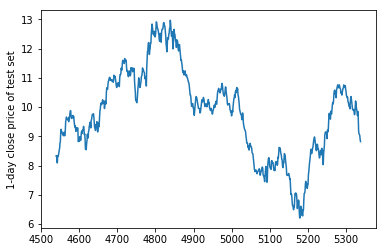

In [11]:
test.plot()
plt.ylabel('1-day close price of test set')

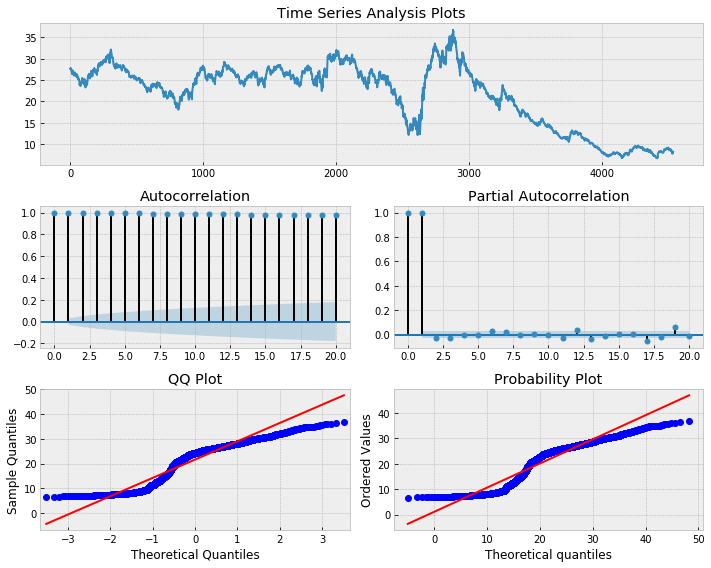

In [12]:
tsplot(train, lags=20)

In [13]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-1.017735528931106,
 0.7467408390323015,
 20,
 4518,
 {'1%': -3.431798211432537,
  '5%': -2.8621799378268897,
  '10%': -2.5671106422610186},
 1761.7304607823098)

Text(0,0.5,'Difference in 1-day close price')

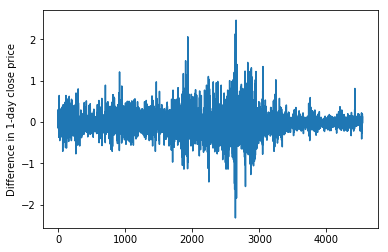

In [14]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [15]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-14.138422582086095,
 2.2684432858564822e-26,
 19,
 4518,
 {'1%': -3.431798211432537,
  '5%': -2.8621799378268897,
  '10%': -2.5671106422610186},
 1760.6954287458175)

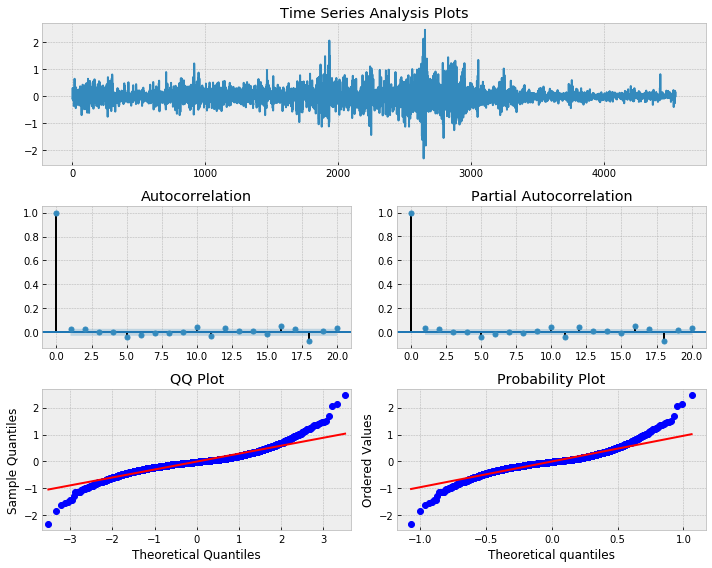

In [16]:
tsplot(train_diff, lags=20)

### Fit Model

In [17]:
arima010 = smt.ARIMA(train, (0,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima010_fit = arima010.fit() #change model name*2
arima010_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4538
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -902.326
Method:                           css   S.D. of innovations              0.295
Date:                Wed, 17 Apr 2019   AIC                           1808.653
Time:                        14:25:32   BIC                           1821.493
Sample:                             1   HQIC                          1813.175
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0043      0.004     -0.978      0.328      -0.013       0.004
==============================================================================
"""

In [18]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4538
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -900.339
Method:                       css-mle   S.D. of innovations              0.295
Date:                Wed, 17 Apr 2019   AIC                           1806.678
Time:                        14:25:51   BIC                           1825.938
Sample:                             1   HQIC                          1813.462
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0043      0.005     -0.949      0.342      -0.013       0.005
ar.L1.D.close     0.0296      0.015      1.994      0.046       0.001       0.059
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           33.7986           +0.0000j           33.7986            0.0000
-----------------------------------------------------------------------------
"""

### Analyze residuals

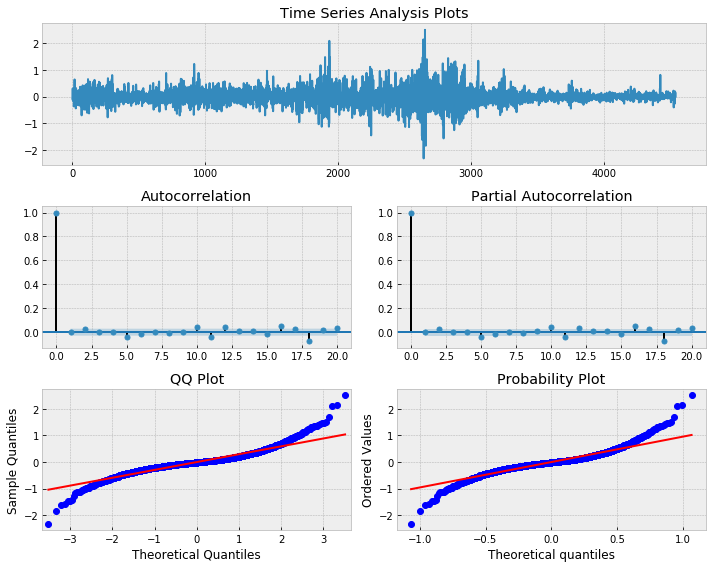

In [19]:
tsplot(arima110_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [20]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima110_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([11.45724565]), array([0.04303114]))

### Forecasting

In [21]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima110_fit.forecast(steps=num_steps)   #change model name

In [22]:
arima110_fit.forecast(steps=num_steps)   #change model name

(array([8.15939154, 8.15521463, 8.15093215, 8.14664653, 8.14236083]),
 array([0.29507117, 0.42351189, 0.52135848, 0.60354921, 0.67581712]),
 array([[7.58106268, 8.73772041],
        [7.32514658, 8.98528269],
        [7.12908831, 9.17277598],
        [6.96371182, 9.32958125],
        [6.81778362, 9.46693803]]))

In [23]:
arima110_fit.forecast(steps=num_steps)[0][4]    #change model name

8.142360828928835

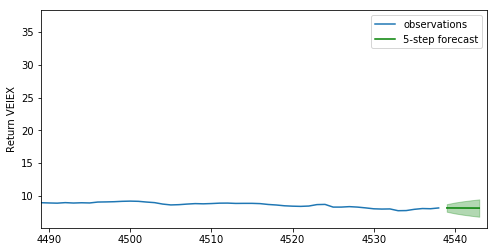

In [24]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return VEIEX')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [26]:
pred = []
for i in range( int(len(close)*0.15) ): 
    moving_train = close.loc[:len(close) -  int(len(close)*0.15)  -5 + i]
    moving_arima110 = smt.ARIMA(moving_train, (1,1,0))   #change model parameters  & model name
    moving_arima110_fit = moving_arima110.fit()   #change model name*2
    
    pred.append(moving_arima110_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

801

In [33]:
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9991717708099181
MAE = 0.2723552193490058
RMSE = 0.34292204957786493
Scaled MAE = 0.04028923363150973
Scaled RMSE = 0.050728113842879424
